In [9]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [6]:
# Load in the data
df = pd.read_csv("../data/all_basic_data.csv")

In [7]:
# Some constants
ndir = 10 # Number of directions from peeling off

In [4]:
# Print a header
df.head(n=10)

,n_stars,stellar_mass,stellar_metallicity,ionizing_luminosity,f_esc,sfr_10,sfr_100,mvir,rvir,redshift,...,beta_dir_0,beta_dir_1,beta_dir_2,beta_dir_3,beta_dir_4,beta_dir_5,beta_dir_6,beta_dir_7,beta_dir_8,beta_dir_9
0,31967.0,7.149566,-3.606605,53.523165,-3.160291,0.82,0.11,9.234144,0.001932,10.0,...,-1.086384,-1.692291,-1.004144,-1.420937,-1.570547,-0.992456,-1.391860,-1.363853,-2.230089,-2.199188
1,50539.0,7.376480,-3.479361,53.323654,-1.132635,0.68,0.19,9.499563,0.002361,10.0,...,-1.882190,-2.412214,-2.441986,-2.238528,-2.382310,-2.331834,-2.119498,-2.369654,-2.254489,-2.300801
2,23168.0,6.979845,-3.407531,53.094837,-0.745604,0.41,0.08,8.990255,0.001602,10.0,...,-1.258022,-2.479552,-0.961888,-1.965357,-2.557239,-2.483516,-2.605934,-1.323825,-1.796427,-2.619682
3,116572.0,7.656417,-3.282300,53.231276,-0.749191,1.08,0.34,9.695849,0.002751,10.0,...,-2.081971,-2.250657,-2.105408,-2.347603,-2.413777,-2.339631,-2.380582,-2.350257,-2.375575,-2.348835
4,27501.0,7.075446,-3.391552,53.112451,-1.222701,0.39,0.13,8.802573,0.001387,10.0,...,-1.745372,-1.990873,-2.270990,-2.209460,-2.323092,-2.279162,-2.229559,-2.249780,-2.166443,-2.182956
5,58050.0,7.393227,-3.721508,53.333181,-1.201217,0.53,0.27,9.429246,0.002244,10.0,...,-2.227647,-2.281190,-2.318773,-2.485119,-2.443098,-2.552385,-2.302865,-2.221181,-2.347203,-2.245679
6,84158.0,7.565318,-3.404906,53.092078,-0.914752,0.49,0.21,9.576676,0.002510,10.0,...,-2.497105,-2.477572,-2.365671,-2.130728,-2.213023,-2.292978,-2.322977,-2.003201,-2.348975,-2.112178
7,464637.0,8.299081,-2.922688,53.454819,-1.255024,1.03,2.10,10.052344,0.003610,10.0,...,-2.037745,-2.018229,-2.017491,-2.006699,-2.098453,-1.840430,-1.838979,-2.024886,-1.962529,-2.058565
8,61656.0,7.450616,-3.433722,53.528050,-0.919589,1.12,0.28,9.461591,0.002293,10.0,...,-2.351597,-2.427192,-2.347284,-2.464998,-2.411082,-2.423944,-2.160504,-2.449493,-2.548413,-2.370295
9,39661.0,7.159046,-3.200290,53.154344,-5.724312,0.44,0.09,8.991689,0.001598,10.0,...,-0.793015,-0.683868,-0.800922,-0.816506,-0.835248,-1.084289,-0.783138,-1.353928,-1.180640,-1.299099


## Make some diagnostic diagrams

First we will make a BPT diagram for SPHINX-20 galaxies using the intrinsic emission.

Text(0.5, 1.0, '${\\rm Intrinsic\\ BPT\\ Diagram}$')

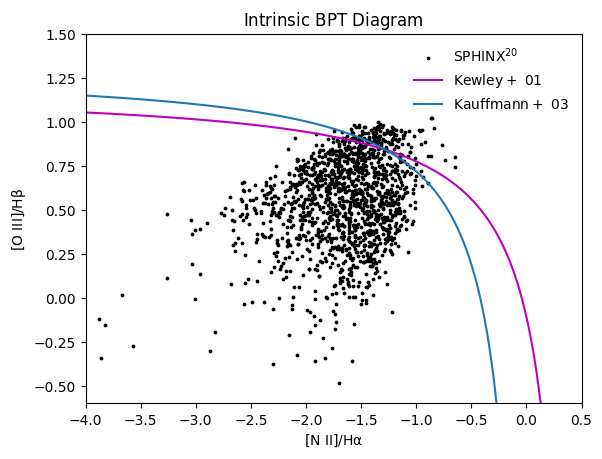

In [23]:
# BPT Diagram -- Intrinsic (i.e. no dust attenuation)
N2_over_Ha = df["N  2 6583.45A sphere"] / df["H  1 6562.80A sphere"]
O3_over_Hb = df["O  3 5006.84A sphere"] / df["H  1 4861.32A sphere"]

plt.scatter(np.log10(N2_over_Ha),np.log10(O3_over_Hb),c="k",s=3,label=r"${\rm SPHINX^{20}}$")

# Kewley 01
xxx = np.linspace(-4.2,0.3,1000)
yyy = 0.61/(xxx-0.47) + 1.19
plt.plot(xxx,yyy,c="m",label=r"${\rm Kewley+\ 01}$")

# Kauffmann
xxx = np.linspace(-4.2,0.,1000)
yyy = 0.61/(xxx-0.05) + 1.3
plt.plot(xxx,yyy,c="tab:blue",label=r"${\rm Kauffmann+\ 03}$")

plt.xlabel(r"${\rm [N\ II]/H\alpha}$")
plt.ylabel(r"${\rm [O\ III]/H\beta}$")

plt.xlim(-4,0.5)
plt.ylim(-0.6,1.5)

plt.legend(loc=1,frameon=False)
plt.title(r"${\rm Intrinsic\ BPT\ Diagram}$")

However, an observer doesn't see the the intrinsic emission. The emission is first attenuated by dust and is then corrected for redenning. For this plot, we show all 10 directions

Text(0.5, 1.0, '${\\rm Dust-Corrected\\ BPT\\ Diagram}$')

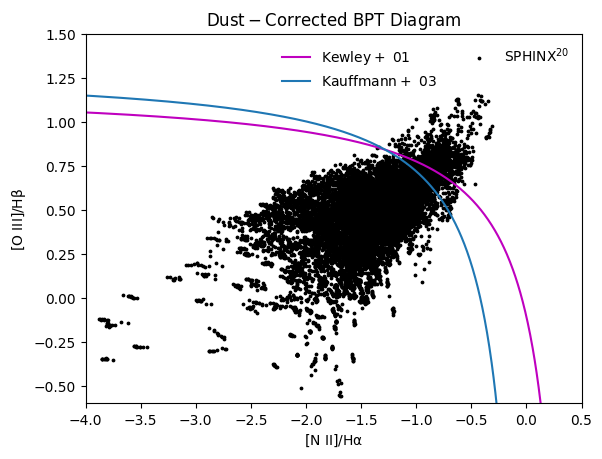

In [27]:
# BPT Diagram -- Dust attenuated then redenning corrected

for i in range(ndir):
    N2_over_Ha = df[f"NII_6583.45_dir_{i}_rc"] / df[f"HI_6562.8_dir_{i}_rc"]
    O3_over_Hb = df[f"OIII_5006.84_dir_{i}_rc"] / df[f"HI_4861.32_dir_{i}_rc"]

    plt.scatter(np.log10(N2_over_Ha),np.log10(O3_over_Hb),c="k",s=3)

# Kewley 01
xxx = np.linspace(-4.2,0.3,1000)
yyy = 0.61/(xxx-0.47) + 1.19
plt.plot(xxx,yyy,c="m",label=r"${\rm Kewley+\ 01}$")

# Kauffmann
xxx = np.linspace(-4.2,0.,1000)
yyy = 0.61/(xxx-0.05) + 1.3
plt.plot(xxx,yyy,c="tab:blue",label=r"${\rm Kauffmann+\ 03}$")

plt.xlabel(r"${\rm [N\ II]/H\alpha}$")
plt.ylabel(r"${\rm [O\ III]/H\beta}$")

plt.xlim(-4,0.5)
plt.ylim(-0.6,1.5)

# Add sphinx to the legend
plt.scatter(-10,-10,c="k",s=3,label=r"${\rm SPHINX^{20}}$")

plt.legend(loc=1,frameon=False,ncol=2)
plt.title(r"${\rm Dust-Corrected\ BPT\ Diagram}$")